In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Code.Tutorial.Dataset  import load_scg
from DTW import dtwPlotTwoWay, dtw_easy
import random

In [2]:
def std_data(noise_level):
    signals_train_l, labels_train_l, duration, fs = load_scg(noise_level, 'train')
    signals_test_l, labels_test_l, _, _ = load_scg(noise_level, 'test')

    signals_l_train_ls = []
    labels_l_train_ls = []
    for cnt, signal in enumerate(signals_train_l):
        if max(signal) > 1:
            continue
        signals_l_train_ls.append(signal)
        labels_l_train_ls.append(labels_train_l[cnt])

    signals_l_test_ls = []
    labels_l_test_ls = []
    for cnt, signal in enumerate(signals_test_l):
        if max(signal) > 1:
            continue
        signals_l_test_ls.append(signal)
        labels_l_test_ls.append(labels_test_l[cnt])


    signals_l_train = np.array(signals_l_train_ls)
    signals_l_test = np.array(signals_l_test_ls)
    labels_l_train = np.array(labels_l_train_ls)
    labels_l_test = np.array(labels_l_test_ls)
    print(signals_l_train.shape, labels_l_test.shape)

    return labels_l_train, labels_l_test, signals_l_train, signals_l_test

In [3]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []

    plt.figure()
    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        pieces.append(signal[begin: end])
        plt.plot(signal[begin: end])
    plt.show()
    return pieces

In [16]:
def extract_dtw(signals, labels, alpha, cnt, show = True):
        signal, hr = signals[cnt], labels[cnt, 2]

        largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
        pieces = segmentation(signal, largepeaks)

        iter_n = 10
        n = 0
        while n < iter_n:
            # piece0, piece1 = random.choice(pieces)[::-1], random.choice(pieces)[::-1]
            piece0, piece1 = random.choice(pieces), random.choice(pieces)


            if show:
                d, cost_matrix, acc_cost_matrix, path = dtw_easy(piece0, piece1, lambda x, y: np.abs(x - y), warp=1, s=1)
                dtwPlotTwoWay(path[0], path[1], piece0, piece1, 0, 4e-6, 'gray')

                d, cost_matrix, acc_cost_matrix, path = dtw_easy(piece0, piece1, lambda x, y: np.abs(x - y), warp=20, s=1)
                dtwPlotTwoWay(path[0], path[1], piece0, piece1, 0, 4e-6, 'gray')
                print(path)
                print(len(pieces[-1]))
                print(path[0].shape, path[1].shape)
                break
            n += 1

(4718, 1000) (2822, 6)


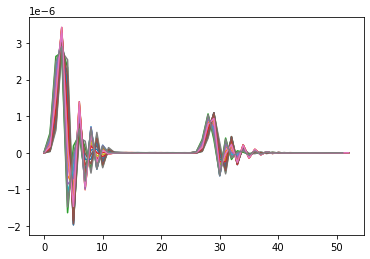

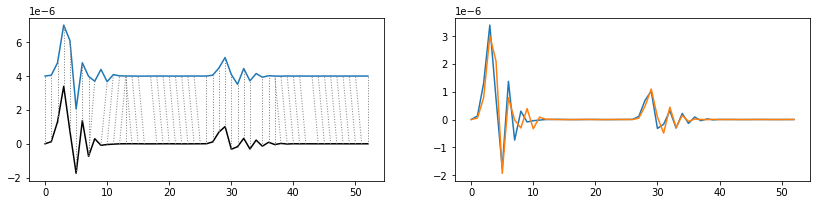

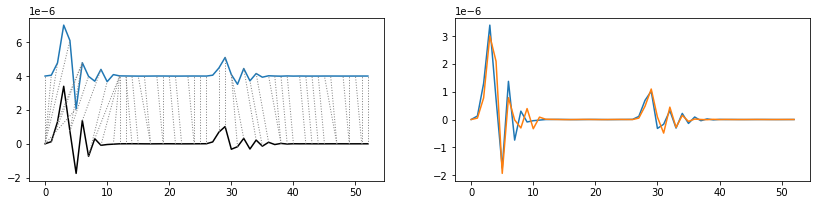

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  4,  5,  6,  7,  8,  8,
        9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 21, 22,
       23, 24, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 38, 39, 39, 40, 41, 42, 43, 44, 44, 45, 46, 47, 47, 48, 49, 49,
       50, 51, 51, 51, 52]), array([ 0,  1,  2,  3,  4,  5,  6,  6,  6,  6,  6,  7,  8,  9, 10, 11, 12,
       12, 12, 12, 12, 12, 13, 13, 14, 15, 15, 16, 17, 18, 19, 19, 20, 21,
       22, 23, 24, 25, 25, 26, 27, 28, 29, 30, 30, 30, 31, 32, 33, 34, 35,
       36, 37, 37, 38, 39, 40, 41, 42, 42, 43, 44, 45, 45, 46, 47, 48, 49,
       49, 50, 51, 52, 52]))
52
(73,) (73,)


In [17]:
if __name__=='__main__':
    labels_l_0_train, labels_l_0_test, signals_l_0_train, signals_l_0_test = std_data(0)

    extract_dtw(signals_l_0_train,labels_l_0_train, 1, 43)